In [1]:
import matplotlib.pyplot as plt
from scipy.special import erfc
import matplotlib as mpl
import numpy as np
from matplotlib.patches import Ellipse


In [2]:
# Define custom colors
new_red = '#FF6384'      # Reddish-pink, coral-like
new_blue = '#36A2EB'     # Vibrant medium blue
new_teal = '#4BC0C0'     # Cyan-green teal
new_green = '#2ECC71'    # Bright emerald green
new_purple = '#9B59B6'   # Vibrant purple
new_orange = '#E67E22'   # Warm orange


In [3]:
def Q_func(x):
    return 0.5 * erfc(x / np.sqrt(2))

def Theoretical_Line(ebnos_db, M):
    ebnos = 10**(ebnos_db / 10)  #input should be linear so convert into linear
    k = np.log2(M)
    esnos = ebnos*k
    return 4*(1 - (1/np.sqrt(M)))*Q_func(np.sqrt(3*esnos/(M-1)))  - 4*((1 - (1/np.sqrt(M)))*Q_func(np.sqrt(3*esnos/(M-1))))**2

In [4]:
eb_no_db_range = np.linspace(-10, 20, 50)
print(eb_no_db_range)

[-10.          -9.3877551   -8.7755102   -8.16326531  -7.55102041
  -6.93877551  -6.32653061  -5.71428571  -5.10204082  -4.48979592
  -3.87755102  -3.26530612  -2.65306122  -2.04081633  -1.42857143
  -0.81632653  -0.20408163   0.40816327   1.02040816   1.63265306
   2.24489796   2.85714286   3.46938776   4.08163265   4.69387755
   5.30612245   5.91836735   6.53061224   7.14285714   7.75510204
   8.36734694   8.97959184   9.59183673  10.20408163  10.81632653
  11.42857143  12.04081633  12.65306122  13.26530612  13.87755102
  14.48979592  15.10204082  15.71428571  16.32653061  16.93877551
  17.55102041  18.16326531  18.7755102   19.3877551   20.        ]


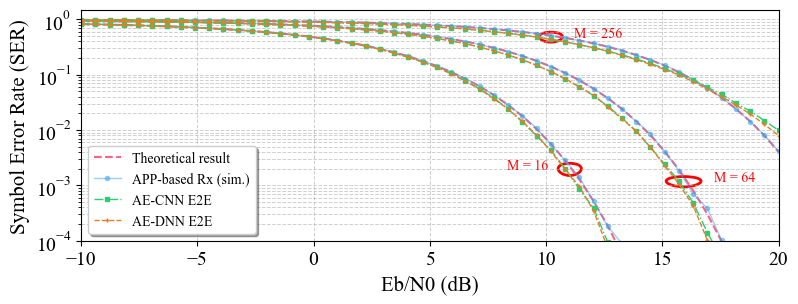

In [5]:
# Set font and style parameters
mpl.rcParams['font.family'] = 'serif'
mpl.rcParams['font.serif'] = ['Times New Roman']
mpl.rcParams['font.size'] = 14

# Data
eb_no_db_range = np.linspace(-10, 20, 50)


ser_theo_16 = Theoretical_Line(eb_no_db_range, 16)
ser_theo_64 = Theoretical_Line(eb_no_db_range, 64)
ser_theo_256 = Theoretical_Line(eb_no_db_range, 256)

ser_baseline_16 = np.loadtxt("ser_baseline_16.csv", delimiter=',')
ser_baseline_64 = np.loadtxt("ser_baseline_64.csv", delimiter=',')
ser_baseline_256 = np.loadtxt("ser_baseline_256.csv", delimiter=',')

ser_aeCNN_16 = np.loadtxt("ser_aeCNN_16.csv", delimiter=',')
ser_aeCNN_64 = np.loadtxt("ser_aeCNN_64.csv", delimiter=',')
ser_aeCNN_256 = np.loadtxt("ser_aeCNN_256.csv", delimiter=',')

ser_aeDNN_16 = np.loadtxt("ser_aeDNN_16.csv", delimiter=',')
ser_aeDNN_64 = np.loadtxt("ser_aeDNN_64.csv", delimiter=',')
ser_aeDNN_256 = np.loadtxt("ser_aeDNN_256.csv", delimiter=',')

# Create figure
plt.figure(figsize=(9, 3))

# Plot theoretical lines
plt.semilogy(eb_no_db_range, ser_theo_16, color=new_red, linestyle='--', label='Theoretical result')
plt.semilogy(eb_no_db_range, ser_theo_64, color=new_red, linestyle='--')
plt.semilogy(eb_no_db_range, ser_theo_256, color=new_red, linestyle='--')

# Plot baseline data
plt.semilogy(eb_no_db_range, ser_baseline_16, color=new_blue, marker='o', linestyle='-', markersize=3, alpha=0.5, linewidth=1, label='APP-based Rx (sim.)')
plt.semilogy(eb_no_db_range, ser_baseline_64, color=new_blue, marker='o', linestyle='-', markersize=3, alpha=0.5, linewidth=1)
plt.semilogy(eb_no_db_range, ser_baseline_256, color=new_blue, marker='o', linestyle='-', markersize=3, alpha=0.5, linewidth=1)

# Plot AE-based data
plt.semilogy(eb_no_db_range, ser_aeCNN_16, color=new_green, marker='s', linestyle='-.', markersize=3, linewidth=1, label='AE-CNN E2E')
plt.semilogy(eb_no_db_range, ser_aeCNN_64, color=new_green, marker='s', linestyle='-.', markersize=3, linewidth=1)
plt.semilogy(eb_no_db_range, ser_aeCNN_256, color=new_green, marker='s', linestyle='-.', markersize=3, linewidth=1)

# Plot AE-DNN data
plt.semilogy(eb_no_db_range, ser_aeDNN_16, color=new_orange, marker='+', linestyle='--', markersize=3, linewidth=1, label='AE-DNN E2E')
plt.semilogy(eb_no_db_range, ser_aeDNN_64, color=new_orange, marker='+', linestyle='--', markersize=3, linewidth=1)
plt.semilogy(eb_no_db_range, ser_aeDNN_256, color=new_orange, marker='+', linestyle='--', markersize=3, linewidth=1)

# Annotation at index 1 with ellipse
annotation_index_1 = 34
ellipse_1 = Ellipse(xy=(eb_no_db_range[annotation_index_1]+0.2, ser_aeCNN_16[annotation_index_1]),
                    width=1, height=0.001,
                    facecolor='none', edgecolor='red', linewidth=2)
plt.gca().add_patch(ellipse_1)
plt.annotate('M = 16',
             xy=(eb_no_db_range[annotation_index_1], ser_aeCNN_16[annotation_index_1]),
             xytext=(eb_no_db_range[annotation_index_1]-2.5, ser_aeCNN_16[annotation_index_1]),
             fontsize=10, color='red')

# Annotation at index 2 with ellipse
annotation_index_2 = 42
ellipse_2 = Ellipse(xy=(eb_no_db_range[annotation_index_2]+.2, ser_aeCNN_64[annotation_index_2]),
                    width=1.5, height=0.0005,
                    facecolor='none', edgecolor='red', linewidth=2)
plt.gca().add_patch(ellipse_2)
plt.annotate('M = 64',
             xy=(eb_no_db_range[annotation_index_2], ser_aeCNN_64[annotation_index_2]),
             xytext=(eb_no_db_range[annotation_index_2] +1.5, ser_aeCNN_64[annotation_index_2]-0.00002),
             fontsize=10, color='red')

# Annotation at index 3 with ellipse
annotation_index_3 = 33
ellipse_3 = Ellipse(xy=(eb_no_db_range[annotation_index_3], ser_aeCNN_256[annotation_index_3]+0.05),
                    width=1, height=0.2,
                    facecolor='none', edgecolor='red', linewidth=2)
plt.gca().add_patch(ellipse_3)
plt.annotate('M = 256',
             xy=(eb_no_db_range[annotation_index_3]+3, ser_aeCNN_256[annotation_index_3]),
             xytext=(eb_no_db_range[annotation_index_3]+1, ser_aeCNN_256[annotation_index_3] + 0.05),
             fontsize=10, color='red')

# Customize plot
plt.legend(loc='lower left', fontsize=10, frameon=True, shadow=True, fancybox=True)
plt.xlabel('Eb/N0 (dB)', fontsize=15)
plt.ylabel('Symbol Error Rate (SER)', fontsize=15)
plt.grid(True, which='both', linestyle='--', linewidth=0.7, alpha=0.6)
plt.ylim(1e-4, 1.5)
plt.xlim(-10,20)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)

# Show plot
plt.show()